## intro

## Introduction

The provided dataset contains detailed user and activity information, collected from an e-commerce platform. This dataset includes information from two CSV files: **User_Information.csv** and **User_Activity.csv**. The goal of the analysis is to explore and process the data to derive insights related to user behavior, activity, and sales trends. The dataset consists of various attributes, including user demographics, transaction data, and activity metrics.

The analysis is performed in several stages:

1. **Data Import**: Both datasets are loaded into Pandas DataFrames.
2. **Data Merging**: The datasets are merged using an inner join on the common column `customerid`.
3. **Data Cleaning**: Missing values are handled by filling with appropriate methods like the median, and outliers are detected and replaced with the mean for specified columns.
4. **Feature Engineering**: New columns such as `year`, `month`, and `day` are derived from the `invoicedate` column to enhance the data.
5. **Data Visualization**: Various visualizations are created to understand the distribution of numerical variables, relationships between them, and categorical variable distributions.
6. **Correlation Analysis**: A heatmap is used to explore correlations between numerical columns, identifying key variables affecting sales and user behavior.


### Questions Analyzed in the Dataset:

1. **What is the distribution of user ages and how does it relate to transaction behavior?**
   
2. **How do purchase frequency vary across different user demographics (country)?**
   
3. **What is the distribution of order statuses categorized as Completed, In Process, Cancelled, and Returned?**
   
4. **Which products or services generate the highest sales, and what are the factors influencing these sales?**
   
5. **How does user activity, like purchasing, change over the year?**
   
6. **What is the impact of different payment methods on user spending behavior?**


In [60]:
# import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## load first file (User_Information.csv) , and display information

In [61]:
df1 = pd.read_csv('User_Information.csv')

print("Dimensions of DF1: ", df1.shape)

print("\nInformation about DF1: ",df1.info())

print("\nFirst 5 rows (head) of DF1: \n")
df1.head()

Dimensions of DF1:  (3599, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      3539 non-null   float64
 1   gender          3539 non-null   object 
 2   country         3539 non-null   object 
 3   trafficsource   3535 non-null   object 
 4   devicecategory  3539 non-null   object 
 5   device          3537 non-null   object 
 6   os              3536 non-null   object 
 7   age             3535 non-null   float64
dtypes: float64(2), object(6)
memory usage: 225.1+ KB

Information about DF1:  None

First 5 rows (head) of DF1: 



,customerid,gender,country,trafficsource,devicecategory,device,os,age
0,9691.0,Female,India,Social Media,Computer,Laptop,Windows,34.0
1,8327.0,Female,India,Social Media,Computer,Desktop,Windows,28.0
2,6801.0,Male,United States,Paid Advertisment,Computer,Desktop,Windows,36.0
3,4406.0,Male,Philippines,Social Media,Mobile,Tablet,Windows,45.0
4,1966.0,Male,Brazil,NaN,Computer,Laptop,Windows,27.0


## load second file (User_Activity.csv) , and display information


In [62]:
df2 = pd.read_csv('User_Activity.csv')

print("Dimensions of DF2: ", df2.shape)

print("\nInformation about DF2: ",df2.info())

print("\nFirst 5 rows (head) of DF2: \n")
df2.head()

Dimensions of DF2:  (5083, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerid                   5083 non-null   int64  
 1   invoicedate                  5083 non-null   object 
 2   invoicenumber                5083 non-null   int64  
 3   productid                    5083 non-null   int64  
 4   quantity                     5083 non-null   int64  
 5   price                        5083 non-null   float64
 6   total                        5083 non-null   float64
 7   orderstatus                  5083 non-null   object 
 8   sessionduration              5075 non-null   float64
 9   deliveryrating               5077 non-null   float64
 10  productrating                5078 non-null   float64
 11  sales                        5083 non-null   float64
 12  payment_method               5080 non-null   

,customerid,invoicedate,invoicenumber,productid,quantity,price,total,orderstatus,sessionduration,deliveryrating,productrating,sales,payment_method,avg_price_per_product,customer_satisfaction_index
0,9691,1/1/2019,26088332,32,3,91.37,274.11,Completed,6.54,2.0,5.0,274.11,PayPal,91.37,959.385
1,8327,1/1/2019,95183269,34,1,48.24,48.24,In Process,5.01,0.0,0.0,0.00,Credit Card,48.24,0.000
2,6801,1/1/2019,44769684,64,2,35.23,70.46,Completed,0.10,1.0,2.0,70.46,PayPal,35.23,105.690
3,4406,1/2/2019,12422351,41,2,32.33,64.66,Completed,1.95,4.0,4.0,64.66,Credit Card,32.33,258.640
4,1966,1/3/2019,84352310,20,1,81.89,81.89,Completed,9.15,5.0,3.0,81.89,Bank Transfer,81.89,327.560


## merge:
-  Standardize Column Names first
- we have common column [id] in both datasets , so we are going to use inner join on [id] column



In [63]:
# Standardize Column Names
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

# Merge (Inner join)
innerjoin=pd.merge(df1,df2,on='customerid')
# Save file after inner join
innerjoin.to_csv('innerjoin.csv',index=False)
print("File was saved")
# Remove spaces from column names
innerjoin.columns = innerjoin.columns.str.strip()



File was saved


# Data cleaning
- 1-drop rows with non value (axis=0)
- 1-Remove duplication in the rows (check and process if exist)
- 2-Remove rows contains noisy data (Some movies has 'zero' budget or revenue. So,
- we need to discard it)
- 3-Check NN values and modify it with a value (zero or mean or median or stay as it is
- according to the data)


## Data Warngling

In [64]:
innerjoin.head()

,customerid,gender,country,trafficsource,devicecategory,device,os,age,invoicedate,invoicenumber,...,price,total,orderstatus,sessionduration,deliveryrating,productrating,sales,payment_method,avg_price_per_product,customer_satisfaction_index
0,9691.0,Female,India,Social Media,Computer,Laptop,Windows,34.0,1/1/2019,26088332,...,91.37,274.11,Completed,6.54,2.0,5.0,274.11,PayPal,91.37,959.385
1,8327.0,Female,India,Social Media,Computer,Desktop,Windows,28.0,1/1/2019,95183269,...,48.24,48.24,In Process,5.01,0.0,0.0,0.00,Credit Card,48.24,0.000
2,6801.0,Male,United States,Paid Advertisment,Computer,Desktop,Windows,36.0,1/1/2019,44769684,...,35.23,70.46,Completed,0.10,1.0,2.0,70.46,PayPal,35.23,105.690
3,4406.0,Male,Philippines,Social Media,Mobile,Tablet,Windows,45.0,1/2/2019,12422351,...,32.33,64.66,Completed,1.95,4.0,4.0,64.66,Credit Card,32.33,258.640
4,1966.0,Male,Brazil,NaN,Computer,Laptop,Windows,27.0,1/3/2019,84352310,...,81.89,81.89,Completed,9.15,5.0,3.0,81.89,Bank Transfer,81.89,327.560


In [65]:
innerjoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerid                   8606 non-null   float64
 1   gender                       8496 non-null   object 
 2   country                      8436 non-null   object 
 3   trafficsource                8487 non-null   object 
 4   devicecategory               8498 non-null   object 
 5   device                       8403 non-null   object 
 6   os                           8475 non-null   object 
 7   age                          8458 non-null   float64
 8   invoicedate                  8606 non-null   object 
 9   invoicenumber                8606 non-null   int64  
 10  productid                    8606 non-null   int64  
 11  quantity                     8606 non-null   int64  
 12  price                        8606 non-null   float64
 13  total             

In [66]:
innerjoin.describe()

,customerid,age,invoicenumber,productid,quantity,price,total,sessionduration,deliveryrating,productrating,sales,avg_price_per_product,customer_satisfaction_index
count,8606.000000,8458.000000,8.606000e+03,8606.000000,8606.000000,8606.000000,8606.000000,8596.00000,8594.000000,8599.000000,8606.000000,8606.000000,8587.000000
mean,5529.668952,30.235162,5.539966e+07,50.757030,1.972810,49.240241,97.580327,5.05465,2.631720,2.666705,62.435818,49.240241,262.251356
std,2622.417460,9.035065,2.554992e+07,28.457116,0.810566,29.573284,74.562044,2.93091,2.174388,2.185638,76.581002,29.573284,324.344187
min,1111.000000,-41.000000,1.114055e+07,1.000000,1.000000,1.220000,1.220000,0.01000,0.000000,0.000000,0.000000,1.220000,0.000000
25%,3250.000000,23.000000,3.307006e+07,27.000000,1.000000,26.030000,37.610000,2.54000,0.000000,0.000000,0.000000,26.030000,0.000000
50%,5605.500000,30.000000,5.577515e+07,51.000000,2.000000,48.160000,79.570000,5.10000,3.000000,4.000000,32.430000,48.160000,137.720000
75%,7824.250000,36.000000,7.751005e+07,75.000000,3.000000,74.770000,147.660000,7.53000,5.000000,5.000000,98.640000,74.770000,423.680000
max,9998.000000,95.000000,9.996354e+07,100.000000,3.000000,99.720000,299.160000,10.00000,5.000000,5.000000,299.160000,99.720000,1493.700000


In [67]:
innerjoin.isnull().sum()

customerid                       0
gender                         110
country                        170
trafficsource                  119
devicecategory                 108
device                         203
os                             131
age                            148
invoicedate                      0
invoicenumber                    0
productid                        0
quantity                         0
price                            0
total                            0
orderstatus                      0
sessionduration                 10
deliveryrating                  12
productrating                    7
sales                            0
payment_method                   3
avg_price_per_product            0
customer_satisfaction_index     19
dtype: int64

In [68]:
innerjoin.duplicated().sum()

3608

In [69]:
innerjoin.drop_duplicates(keep="first",inplace=True)

### Fill missing values in specified columns with "Unknown"


In [70]:
str_col = ["gender", "country", "device", "os", "payment_method", "trafficsource", "devicecategory"]
innerjoin[str_col] = innerjoin[str_col].fillna("Unknown")

### Fill missing values with the median for specified columns


In [71]:
num_col = ["age", "deliveryrating", "sessionduration", "productrating","customer_satisfaction_index"]
innerjoin[num_col] = innerjoin[num_col].apply(lambda x: x.fillna(x.mean()))

###  Count of negative or zero age values in the dataset

In [72]:
wrong_age= (innerjoin['age'] <= 0).sum()
print("negative or zero age are: ",wrong_age)

innerjoin['age'] = innerjoin['age'].apply(lambda x: np.nan if x < 0 else x)
innerjoin['age'].fillna(innerjoin['age'].median(), inplace=True)

wrong_age = (innerjoin['age'] <= 0).sum()
print("after removing",wrong_age)


negative or zero age are:  2
after removing 0


C:\Users\Hp\AppData\Local\Temp\ipykernel_10644\652438691.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  innerjoin['age'].fillna(innerjoin['age'].median(), inplace=True)


### Convert invoicedate to datetime and extract year, month, and day.



In [73]:
innerjoin['invoicedate'] = pd.to_datetime(innerjoin['invoicedate'], errors='coerce')

innerjoin['year'] = pd.DatetimeIndex(innerjoin['invoicedate']).year
innerjoin['month'] = pd.DatetimeIndex(innerjoin['invoicedate']).month
innerjoin['day'] = innerjoin['invoicedate'].dt.day_name()

innerjoin = innerjoin.drop(columns=['invoicedate'])


In [74]:
innerjoin.head()

,customerid,gender,country,trafficsource,devicecategory,device,os,age,invoicenumber,productid,...,sessionduration,deliveryrating,productrating,sales,payment_method,avg_price_per_product,customer_satisfaction_index,year,month,day
0,9691.0,Female,India,Social Media,Computer,Laptop,Windows,34.0,26088332,32,...,6.54,2.0,5.0,274.11,PayPal,91.37,959.385,2019,1,Tuesday
1,8327.0,Female,India,Social Media,Computer,Desktop,Windows,28.0,95183269,34,...,5.01,0.0,0.0,0.00,Credit Card,48.24,0.000,2019,1,Tuesday
2,6801.0,Male,United States,Paid Advertisment,Computer,Desktop,Windows,36.0,44769684,64,...,0.10,1.0,2.0,70.46,PayPal,35.23,105.690,2019,1,Tuesday
3,4406.0,Male,Philippines,Social Media,Mobile,Tablet,Windows,45.0,12422351,41,...,1.95,4.0,4.0,64.66,Credit Card,32.33,258.640,2019,1,Wednesday
4,1966.0,Male,Brazil,Unknown,Computer,Laptop,Windows,27.0,84352310,20,...,9.15,5.0,3.0,81.89,Bank Transfer,81.89,327.560,2019,1,Thursday


###



# Data visualization

### 1. **What is the distribution of user ages and how does it relate to transaction behavior?**

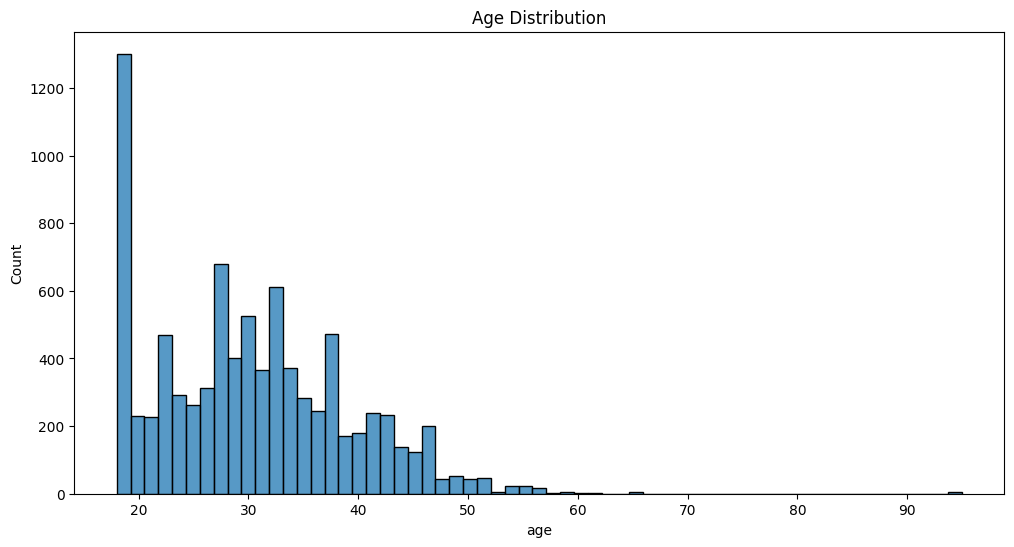

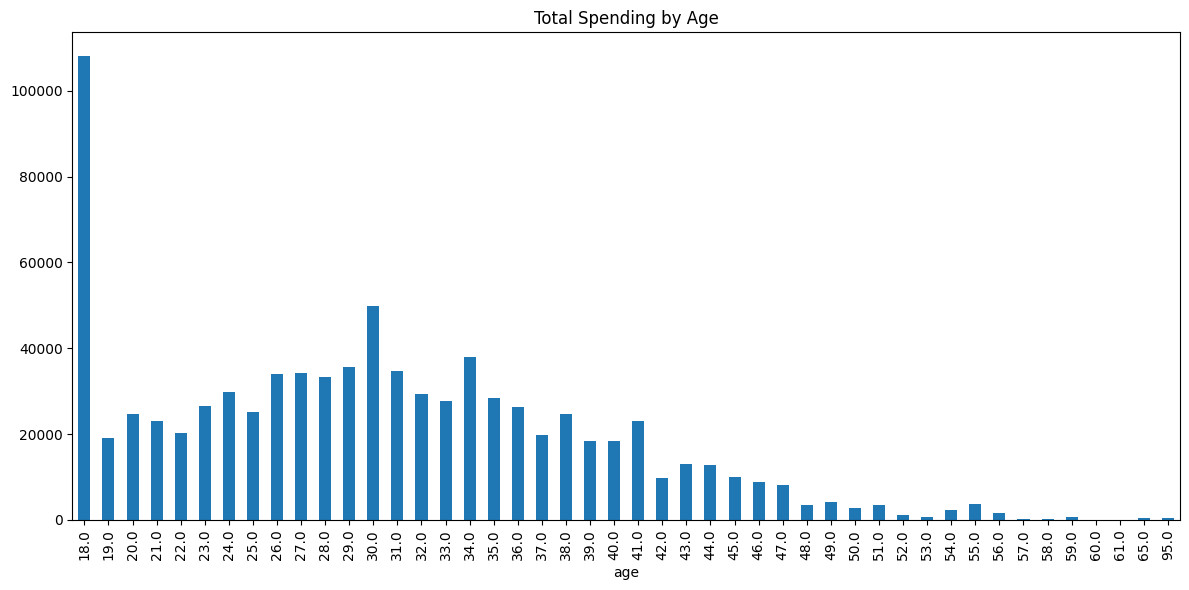

In [75]:
innerjoin['age'] = innerjoin['age'].round()

plt.figure(figsize=(12, 6))
sns.histplot(innerjoin['age'])
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
age_spending = innerjoin.groupby('age')['total'].sum()
age_spending.plot(kind='bar', title="Total Spending by Age")
plt.tight_layout() 
plt.show()

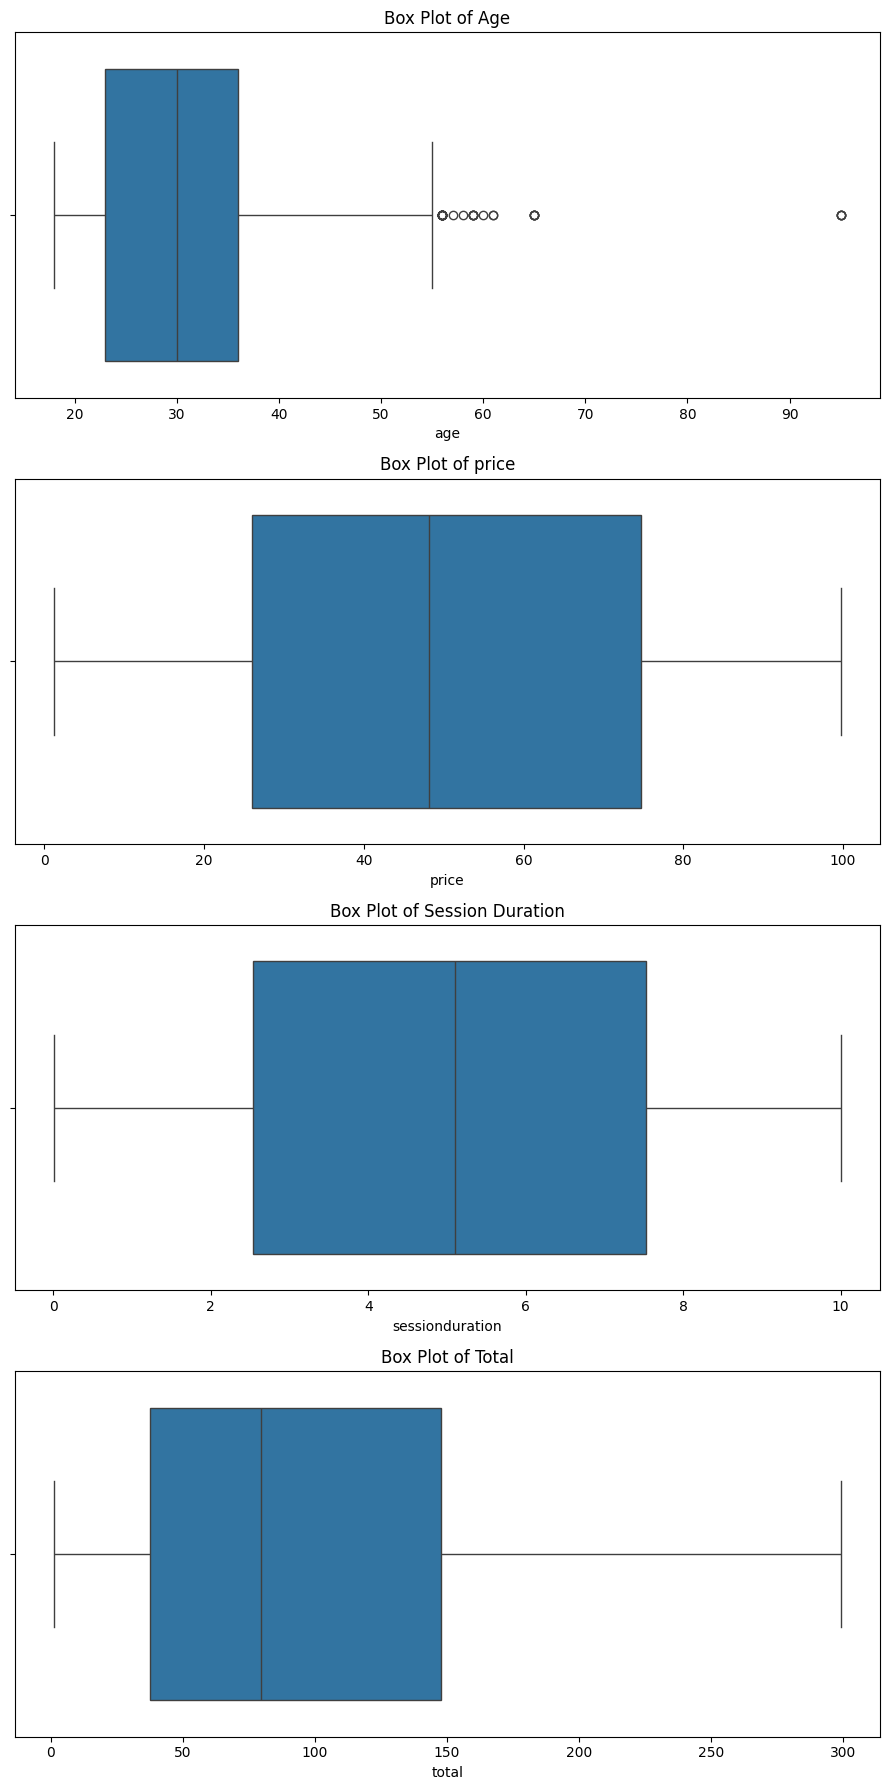

In [76]:

fig, axes = plt.subplots(4, 1, figsize=(9, 18))

# Box Plot for 'age'
sns.boxplot(x='age', data=innerjoin, ax=axes[0])
axes[0].set_title('Box Plot of Age')

# Box Plot for 'Price'
sns.boxplot(x='price', data=innerjoin, ax=axes[1])
axes[1].set_title('Box Plot of price')

# Box Plot for 'sessionduration'
sns.boxplot(x='sessionduration', data=innerjoin, ax=axes[2])
axes[2].set_title('Box Plot of Session Duration')

# Box Plot for 'total'
sns.boxplot(x='total', data=innerjoin, ax=axes[3])
axes[3].set_title('Box Plot of Total')

plt.tight_layout()
plt.show()





### Reomve Outliers  

In [77]:
def outliers(innerjoin, columns):
    for column in columns:
        # Calculate the iqr
        q1 = innerjoin[column].quantile(0.25)
        q3 = innerjoin[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        cal_mean = innerjoin[column].mean()
        # Replace outliers with the mean
        innerjoin[column] = innerjoin[column].where((innerjoin[column] >= lower) & (innerjoin[column] <= upper), cal_mean)
    return innerjoin

removove_outliers = ["age"]
innerjoin = outliers(innerjoin, removove_outliers)

### After Reoming Outliers

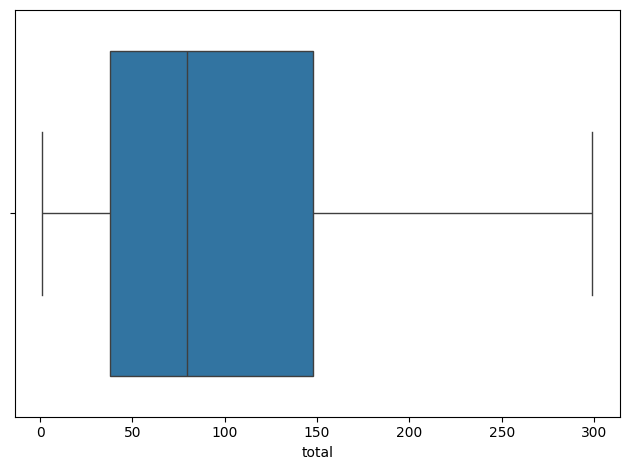

In [78]:
sns.boxplot(x='total', data=innerjoin)
plt.tight_layout()
plt.show()


### 2. **How do purchase frequency vary across different user demographics country?**

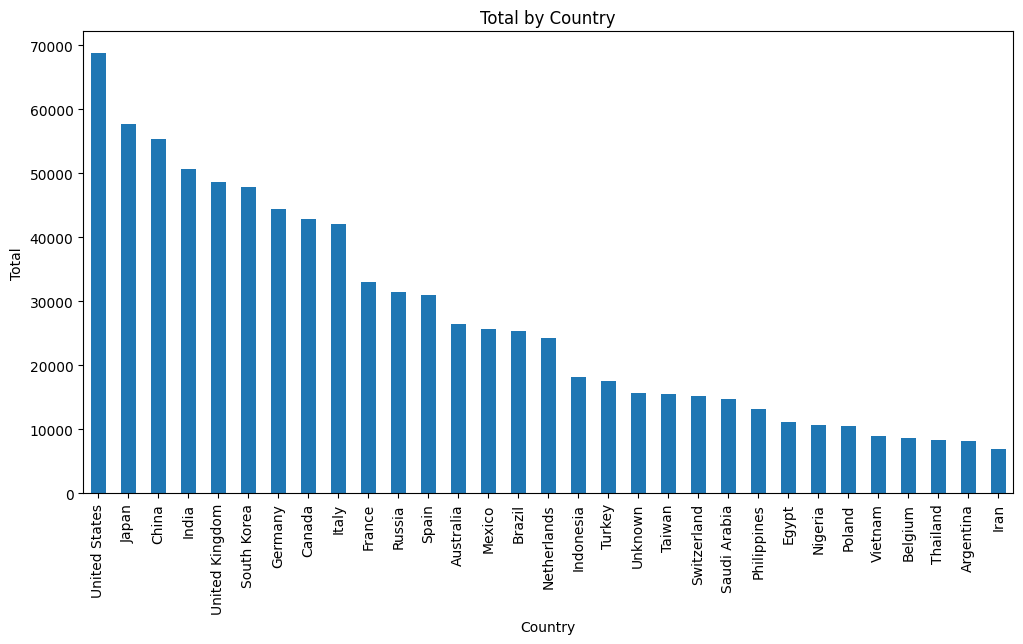

In [79]:
# bar chart
plt.figure(figsize=(12, 6))
innerjoin.groupby('country')['total'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total')
plt.title('Total by Country')
plt.show()


### 3-What is the distribution of order statuses categorized as Completed, In Process, Cancelled, and Returned?

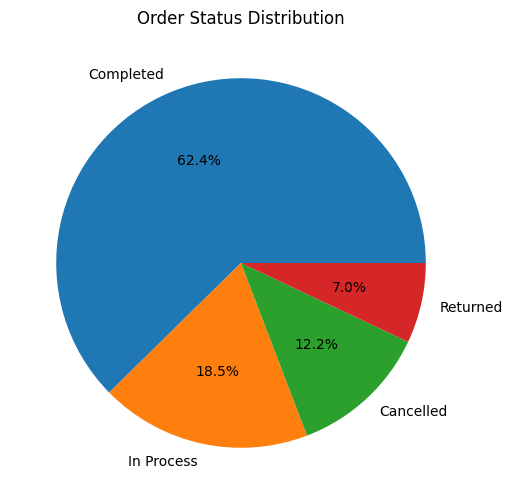

In [80]:
plt.figure(figsize=(8, 6))
num_oreder_status = innerjoin['orderstatus'].value_counts()
plt.pie(num_oreder_status, labels=num_oreder_status.index, autopct='%1.1f%%')
plt.title('Order Status Distribution')
plt.show()

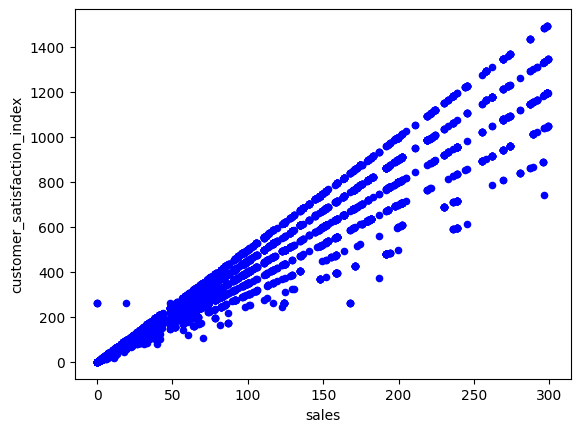

In [81]:

innerjoin.plot(x= 'sales', y= 'customer_satisfaction_index' , kind='scatter', color = 'blue')
plt.show()

# innerjoin.plot(x= 'price', y= 'total' , kind='scatter', color = 'blue')
# plt.show()
# innerjoin.plot(x= 'price', y= 'avg_price_per_product' , kind='scatter', color = 'blue')
# plt.show()


### 4. **Which products or services generate the highest sales, and what are the factors influencing these sales?**

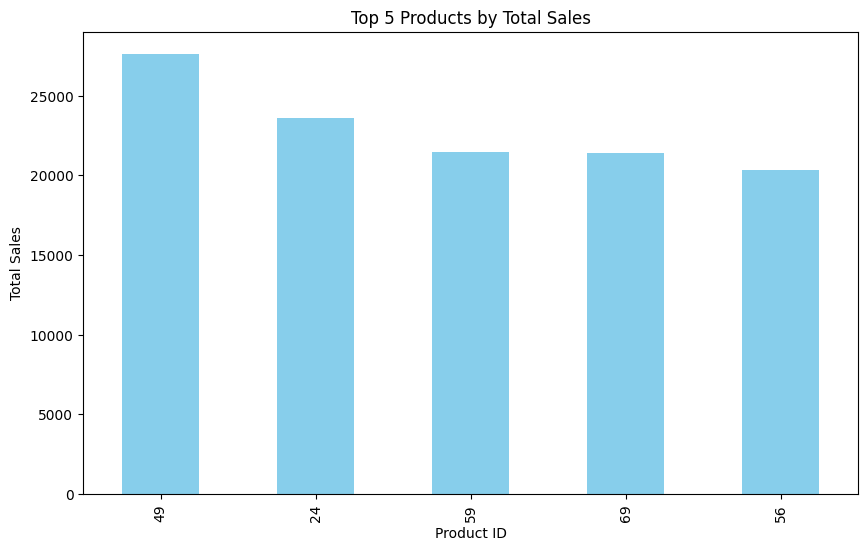

In [82]:
# Group the data by productid and calculate the total sales
product_sales = innerjoin.groupby('productid')['total'].sum()

top_sales = product_sales.sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()


### 5. **How does user activity, like purchasing, change over year?**

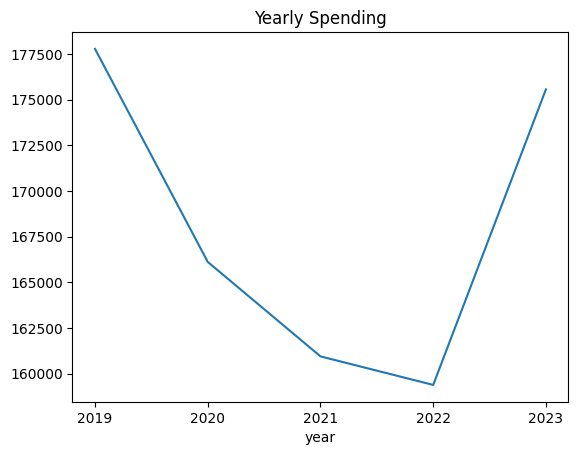

In [83]:
yearly_spending = innerjoin.groupby('year')['total'].sum()

yearly_spending.plot(kind='line', title="Yearly Spending")
plt.xticks(yearly_spending.index)  
plt.show()



### 6. **What is the impact of different payment methods on user spending behavior?**

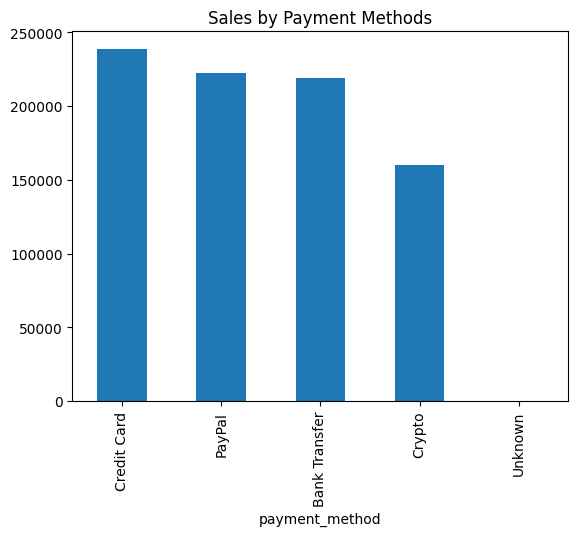

In [84]:
payment_methods = innerjoin.groupby('payment_method')['total'].sum()
payment_methods.sort_values(ascending=False).plot(kind='bar', title="Sales by Payment Methods")
plt.show()

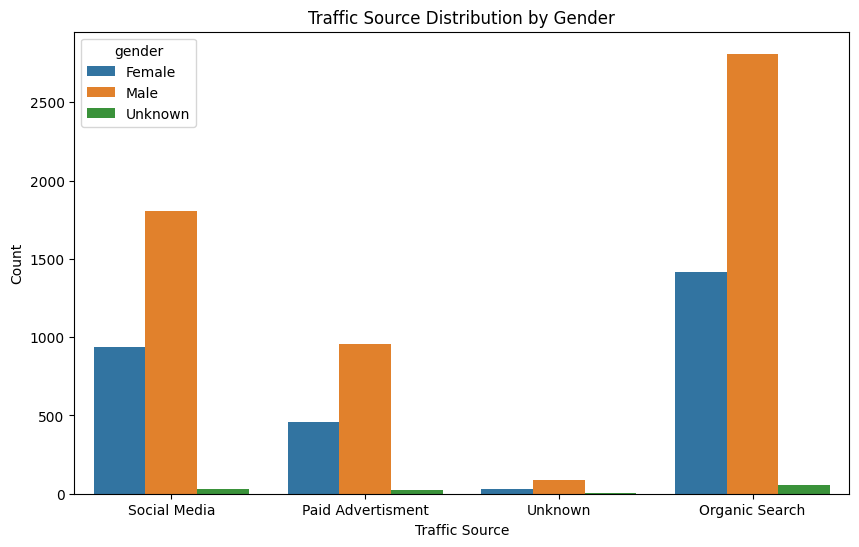

In [85]:
# Traffic Source Distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=innerjoin, x='trafficsource', hue='gender')
plt.title('Traffic Source Distribution by Gender')
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.show()

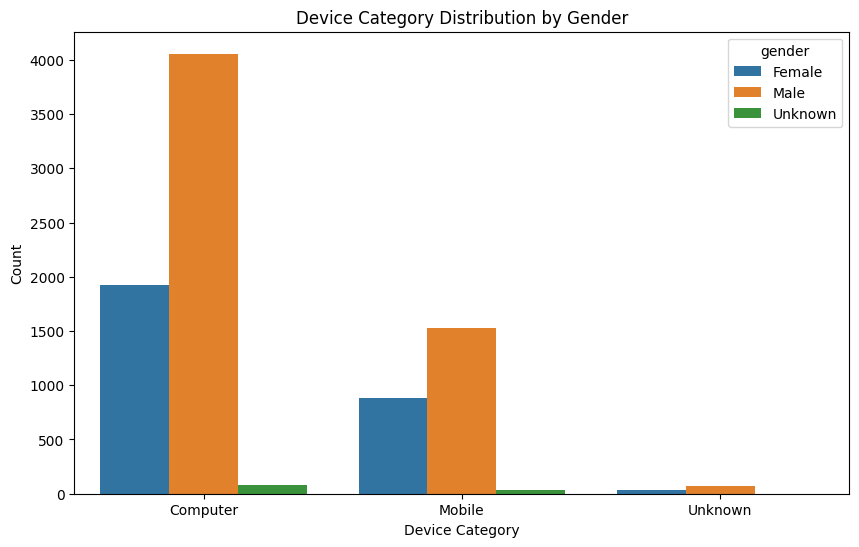

In [86]:
# Device Category Distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=innerjoin, x='devicecategory', hue='gender')
plt.title('Device Category Distribution by Gender')
plt.xlabel('Device Category')
plt.ylabel('Count')
plt.show()

#### Correlation Heatmap Analysis  
- *Purpose*: Visualize relationships between numeric variables.  
### Strong Correlations:
1. **Price and Total**: A strong correlation of 0.79, indicating that an increase in price is associated with an increase in the total amount.
2. **Avg Price per Product and Customer Satisfaction Index**: A strong correlation of 0.62, suggesting that the average price per product influences customer satisfaction.
### No Correlation:
1. **Customer ID and Quantity**: Most values are near zero, indicating no clear relationship.
2. **Age and Price**: No significant correlation observed between these variables.
### Weak Negative Correlations:
1. **Delivery Rating and Age**: A weak negative correlation, indicating a slight inverse relationship.
2. **Session Duration and Month**: A weak negative correlation, suggesting that as the month progresses, session duration may decrease slightly.


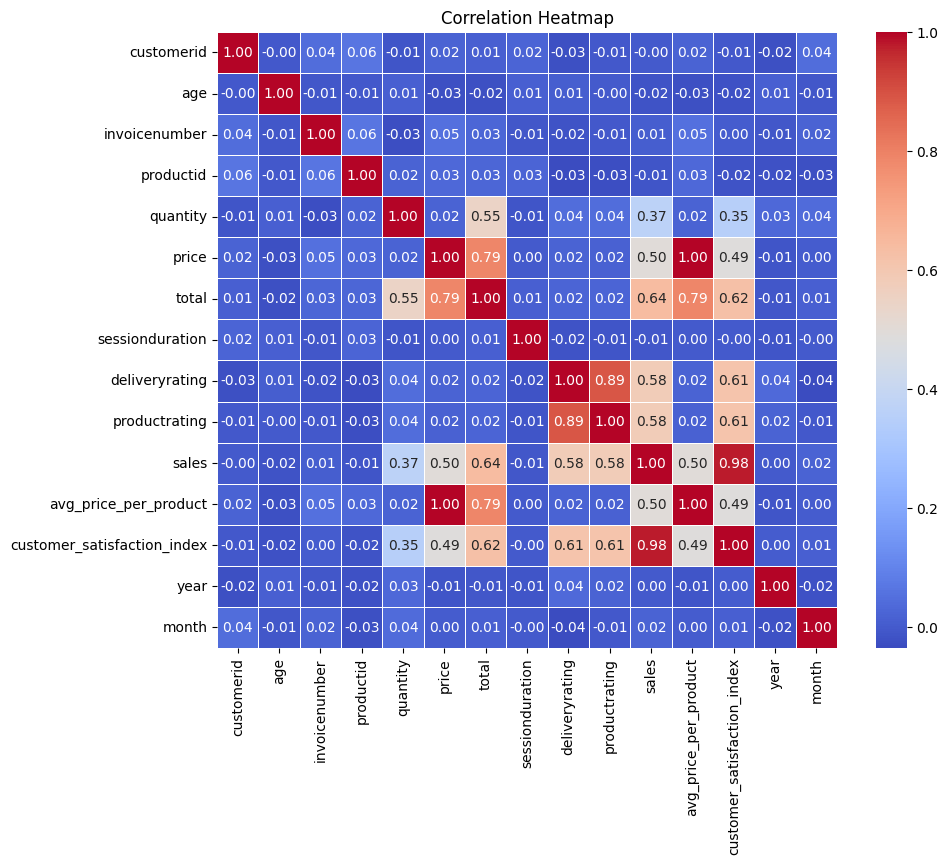

In [87]:
corr = innerjoin.select_dtypes(include=['number']).corr()

# Heatmap: Correlation between numerical variables

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Key Insights

1. **Economic Impact on Sales**  
   Countries with strong economies tend to have higher sales.

2. **Top Countries by Sales**  
   Customers from the United States, India, and Japan have the highest total sales.

3. **Age and Spending Behavior**  
   Younger age groups tend to spend more on purchases.

4. **Gender and Orders**  
   Male customers account for more than 60% of total orders.

5. **Sales by Payment Method**  
   - **Credit Card**: Drives the highest sales.  
   - **Bank Transfer and PayPal**: Show moderate and similar sales levels.  
   - **Crypto**: Has the lowest sales.

6. **Website Traffic**  
   The highest way to reach the website is through organic search.

7. **Sales through Social Media**  
   Sales through social media are often made via computer.

8. **Price and Gender Association**  
   Higher prices tend to be associated with male customers.

9. **Age and Spending**  
   Age is positively correlated with the total amounts spent.



## Machine Learning Model
 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

selected_columns = [
    'age', 'devicecategory', 'os', 'sessionduration',
    'deliveryrating', 'productrating', 'sales',
    'avg_price_per_product', 'customer_satisfaction_index', 'total'
]


data = innerjoin[selected_columns]
data = data.dropna()
X = data.drop('total', axis=1)
y = data['total']

# Encode categorical variables manually if needed (OneHotEncoder)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42, n_estimators=500)
rf.fit(X_train, y_train)

predection = rf.predict(X_test)

Mean_Squared_rf = mean_squared_error(y_test, predection)
R_squared_rf = r2_score(y_test, predection)

print(f"Mean Squared Error: {Mean_Squared_rf}")
print(f"R-squared: {R_squared_rf}")
# accuracy = sum(abs(y_test - predection) / y_test <= 0.1) / len(y_test)
# print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 415.7944660636205
R-squared: 0.9240370163141302
